# <a id='toc1_'></a>[KHÁM PHÁ DỮ LIỆU - EXPLORING DATA](#toc0_)
---

Nhiệm vụ của phần này là làm sạch và phân tích dữ liệu đã được thu thập

**Table of contents**<a id='toc0_'></a>    
- [KHÁM PHÁ DỮ LIỆU - EXPLORING DATA](#toc1_)    
  - [IMPORT](#toc1_1_)    
  - [ĐỌC DỮ LIỆU](#toc1_2_)    
  - [LÀM SẠCH VÀ PHÂN TÍCH DỮ LIỆU](#toc1_3_)    
    - [Dữ liệu có bao nhiêu dòng, cột](#toc1_3_1_)    
    - [Thông tin về các dòng dữ liệu](#toc1_3_2_)    
      - [Ý nghĩa từng dòng dữ liệu](#toc1_3_2_1_)    
      - [Kiểm tra các dòng dữ liệu trùng lặp](#toc1_3_2_2_)    
    - [Thông tin về các cột dữ liệu](#toc1_3_3_)    
      - [Ý nghĩa của các cột dữ liệu](#toc1_3_3_1_)    
      - [Kiểm tra kiểu dữ liệu của mỗi cột](#toc1_3_3_2_)    
      - [Sự phân bố dữ liệu của các cột có kiểu định lượng](#toc1_3_3_3_)    
        - [Tính toán các giá trị thống kê và xử lý giá trị thiếu](#toc1_3_3_3_1_)    
        - [Sự phân bố dữ liệu](#toc1_3_3_3_2_)    
        - [Xử lý dữ liệu lỗi hoặc bất thường](#toc1_3_3_3_3_)    
      - [Sự phân bố dữ liệu của các cột có kiểu định tính](#toc1_3_3_4_)    
      - [Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột](#toc1_3_3_5_)    
      - [Số giá trị phân biệt của mỗi cột](#toc1_3_3_6_)    
  - [SAU CÁC BƯỚC TIỀN XỬ LÝ](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[IMPORT](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_2_'></a>[ĐỌC DỮ LIỆU](#toc0_)

In [2]:
data = pd.read_csv('../Data/Time-Wasters on Social Media.csv')

In [3]:
data.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


## <a id='toc1_3_'></a>[LÀM SẠCH VÀ PHÂN TÍCH DỮ LIỆU](#toc0_)

### <a id='toc1_3_1_'></a>[Dữ liệu có bao nhiêu dòng, cột](#toc0_)

In [4]:
data.shape

(1000, 31)

### <a id='toc1_3_2_'></a>[Thông tin về các dòng dữ liệu](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Ý nghĩa từng dòng dữ liệu](#toc0_)

- Mỗi dòng là đại diện cho thông tin tổng hợp về một người dùng trong một ngày bao gồm thông tin, hành vi sử dụng và tác động tâm lý.

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### <a id='toc1_3_2_2_'></a>[Kiểm tra các dòng dữ liệu trùng lặp](#toc0_)

In [5]:
n_duplicate = data.duplicated().sum()
n_duplicate

0

Dữ liệu không có các dòng trùng lặp

### <a id='toc1_3_3_'></a>[Thông tin về các cột dữ liệu](#toc0_)
Dữ liệu có các cột sau

In [6]:
data.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

#### <a id='toc1_3_3_1_'></a>[Ý nghĩa của các cột dữ liệu](#toc0_)

Mỗi cột có ý nghĩa sau: 
|Tên cột|Ý nghĩa|
|-------|-------|
| UserID| Mã định danh duy nhất của người dùng|
| Age| Tuổi của người dùng|
| Gender| Giới tính của người dùng (nam, nữ, không xác định giới tính)|
| Location| Vị trí địa lý của người dùng (quốc gia)|
| Income| Thu nhập của người dùng|
| Debt| Người dùng có đang nợ hay không|
| Owns Property| Người dùng có sở hữu bất động sản hay không|
| Profession| Nghề nghiệp của người dùng|
| Demographics| Nhân khẩu học (nông thôn, thành thị)|
| Platform| Nền tảng mà người dùng truy cập|
| Total Time Spent| Tổng thời gian người dùng đã dành trên nên tảng (phút)|
| Number of Sessions| Số lần người dùng truy cập vào nền tảng|
| Video ID| Mã định danh của video được xem|
| Video Category| Thể loại của video|
| Video Length| Thời lượng của video|
| Engagement| Mức độ tương tác của người dùng với video (thích, bình luận, chia sẻ)|
| Importance Score| Điểm đánh giá tầm quan trọng của video đối với người dùng|
| Time Spent On Video| Thời gian người dùng dành để xem một video cụ thể|
| Number of Videos Watched| Số lượng video người dùng đã xem|
| Scroll Rate| Tỷ lệ người dùng cuộn qua nội dung|
| Frequency| Tần suất người dùng tương tác với nền tảng|
| ProductivityLoss| Tác động của việc sử dụng nền tảng đến năng suất của người dùng|
| Satisfaction| Mức độ hài lòng của người dùng|
| Watch Reason| Lý do người dùng xem video|
| DeviceType| Loại thiết bị mà người dùng sử dụng|
| OS| Hệ điều hành trên thiết bị của người dùng|
| Watch Time| Thời trong ngày mà người dùng xem video|
| Self Control| Mức độ kiểm soát việc sử dụng nền tảng của người dùng|
| Addiction Level| Mức độ nghiện của người dùng vào nền tảng|
| CurrentActivity| Người dùng đang làm gì khi xem video|
| ConnectionType| Loại kết nối mạng của người dùng|

Chủ đề đã chọn là: Phân tích thói quen sử dụng thời gian trên mạng xã hội và tác động của nó đến đời sống cá nhân, từ đó rút ra các tác động tiêu cực hoặc tích cực đối với con người.

Lọc ra các cột không liên quan trực tiếp đến chủ đề để tập trung vào các đặc trưng chính, giúp dữ liệu trở nên cô đọng và phù hợp hơn cho phân tích.

Các cột bị loại bỏ là: **UserID, Location, Debt, Owns Property, Demographics, Video ID, Video Length, Engagement, Scroll Rate, Device Type, OS, Watch Time, Connection Type**.

In [7]:
# Liệt kê các cột cần loại bỏ
columns_to_drop = ['UserID', 'Location', 'Debt', 'Owns Property', 
                   'Demographics', 'Video ID', 'Video Length', 'Engagement', 
                   'Scroll Rate', 'DeviceType', 'OS', 'Watch Time', 'ConnectionType']

# Bỏ các cột không cần thiết
data = data.drop(columns=columns_to_drop)

#### <a id='toc1_3_3_2_'></a>[Kiểm tra kiểu dữ liệu của mỗi cột](#toc0_)
Kiểu dữ liệu hiện tại của các cột

In [8]:
data.dtypes

Age                          int64
Gender                      object
Income                       int64
Profession                  object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video Category              object
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
Self Control                 int64
Addiction Level              int64
CurrentActivity             object
dtype: object

Có một số cột dữ liệu chưa được xác định với các kiểu dữ liệu phù hợp.

- Đổi các cột **Gender, Profession, Platform, Video Category, Frequency, Watch Reason, CurrentActivity** thành kiểu dữ liệu Category.

- Đổi cột **Age** thành kiểu dữ liệu Category với các nhóm tuổi khác nhau.

In [9]:
# Gender, Platform, Video Category, Frequency, Watch Reason, CurrentActivity
data['Gender'] = data['Gender'].astype('category')
data['Profession'] = data['Profession'].astype('category')
data['Platform'] = data['Platform'].astype('category')
data['Video Category'] = data['Video Category'].astype('category')
data['Frequency'] = data['Frequency'].astype('category')
data['Watch Reason'] = data['Watch Reason'].astype('category')
data['CurrentActivity'] = data['CurrentActivity'].astype('category')

Chia dữ liệu trong cột Age (18-64) thành các nhóm tuổi như sau:
- Thanh niên (Young Adult): 18 - 24 tuổi

    Giai đoạn bắt đầu bước vào cuộc sống trưởng thành với nhiều thay đổi lớn về học tập, công việc và quan hệ xã hội, có thể dẫn đến nhiều trạng thái tâm lý khác nhau như lo âu, căng thẳng.

- Trưởng thành (Adult): 25 - 44 tuổi

    Giai đoạn người trưởng thành đang ổn định về sự nghiệp, hôn nhân và gia đình, nhưng cũng đối mặt với áp lực cuộc sống, công việc, và trách nhiệm.

- Trung niên (Middle Age): 45 - 59 tuổi

    Giai đoạn này có thể đi kèm với sự căng thẳng, lo âu về sức khỏe và gia đình, đồng thời cũng có nhiều người phải đối mặt với khủng hoảng tuổi trung niên.

- Già (Elderly): 60 tuổi trở lên

    Đây là giai đoạn nghỉ hưu, với các vấn đề về sức khỏe, cô đơn và những thay đổi tâm lý khác do tuổi tác.


In [10]:
# Định nghĩa các khoảng tuổi
bins = [18, 24, 44, 59, 64]

# Đặt nhãn cho các nhóm tuổi
labels = ['Young Adult', 'Adult', 'Middle Age', 'Elderly']

# Phân loại và tạo cột mới Age Group
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Xóa cột Age ban đầu
data = data.drop('Age', axis=1)

Kiểm tra lại

In [11]:
data.dtypes

Gender                      category
Income                         int64
Profession                  category
Platform                    category
Total Time Spent               int64
Number of Sessions             int64
Video Category              category
Importance Score               int64
Time Spent On Video            int64
Number of Videos Watched       int64
Frequency                   category
ProductivityLoss               int64
Satisfaction                   int64
Watch Reason                category
Self Control                   int64
Addiction Level                int64
CurrentActivity             category
Age Group                   category
dtype: object

Các cột đã có kiểu dữ liệu phù hợp

#### <a id='toc1_3_3_3_'></a>[Sự phân bố dữ liệu của các cột có kiểu định lượng](#toc0_)
Các cột có dữ liệu định lượng

In [12]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
print('Các cột có kiểu dữ liệu định lượng: ')
for col_name in numerical_columns:
    print(col_name)

Các cột có kiểu dữ liệu định lượng: 
Income
Total Time Spent
Number of Sessions
Importance Score
Time Spent On Video
Number of Videos Watched
ProductivityLoss
Satisfaction
Self Control
Addiction Level


##### <a id='toc1_3_3_3_1_'></a>[Tính toán các giá trị thống kê và xử lý giá trị thiếu](#toc0_)

Với mỗi cột có kiểu dữ liệu định lượng, thực hiện tính toán các giá trị thống kê cơ bản sau:
- Phần trăm (từ 0 đến 100) của giá trị thiếu
- Giá trị nhỏ nhất (Min)
- Tứ phân vị dưới (Lower quartile)
- Trung vị (Median)
- Tứ phân vị trên (Upper quartile)
- Giá trị lớn nhất (Max)

Các giá trị được làm tròn đến chữ số thập phân thứ nhất.

In [13]:
# Chọn ra những cột có kiểu định lượng
numeric_cols = data.select_dtypes(include=['number']).columns

# Tính toán các giá trị thống kê
def missing_ratio(series):
    return series.isnull().mean() * 100

def lower_quartile(series):
    return series.quantile(0.25)

def median(series):
    return series.median()

def upper_quartile(series):
    return series.quantile(0.75)

min_vals = data[numeric_cols].min()
max_vals = data[numeric_cols].max()
lower_quartiles = data[numeric_cols].apply(lower_quartile)
medians = data[numeric_cols].median()
upper_quartiles = data[numeric_cols].apply(upper_quartile)

# Tạo một DataFrame chứa các giá trị thống kê của những cột định lượng
num_col_info_df = pd.DataFrame({
    "Tỷ lệ giá trị thiếu": data[numeric_cols].apply(missing_ratio).round(1),
    "Giá trị nhỏ nhất": min_vals.round(1),
    "Tứ phân vị dưới": lower_quartiles.round(1),
    "Trung vị": medians.round(1),
    "Tứ phân vị trên": upper_quartiles.round(1),
    "Giá trị lớn nhất": max_vals.round(1)
}).T

# In ra
num_col_info_df

,Income,Total Time Spent,Number of Sessions,Importance Score,Time Spent On Video,Number of Videos Watched,ProductivityLoss,Satisfaction,Self Control,Addiction Level
Tỷ lệ giá trị thiếu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Giá trị nhỏ nhất,20138.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0
Tứ phân vị dưới,38675.2,78.0,6.0,3.0,8.0,14.0,3.0,4.0,5.0,2.0
Trung vị,58805.0,152.0,10.0,5.0,15.0,25.0,5.0,5.0,7.0,3.0
Tứ phân vị trên,79792.2,223.0,15.0,7.0,22.0,37.0,6.0,7.0,8.0,5.0
Giá trị lớn nhất,99676.0,298.0,19.0,9.0,29.0,49.0,9.0,9.0,10.0,7.0


**Nhận xét**: Dữ liệu trong các cột dữ liệu dạng định lượng của DataFrame không có bất kỳ giá trị nào bị thiếu.

##### <a id='toc1_3_3_3_2_'></a>[Sự phân bố dữ liệu](#toc0_)

Từ mô tả của dữ liệu và đánh giá sơ bộ, nhóm nhận thấy rằng trong các cột dữ liệu định lượng thì thì dữ liệu của các cột `Income`, `Total Time Spent` và `Time Spent On Video` là *liên tục*; còn dữ liệu các cột `Number of Sessions`, `Number of Videos Watched`, `Importance Score`, `ProductivityLoss`, `Satisfaction`, `Self Control` và `Addiction Level` là *rời rạc*. Vì vậy nhóm sẽ sử dụng 2 loại biểu đồ là **histogram** cho cột có kiểu dữ liệu liên tục và **bar chart** cho kiểu dữ liệu rời rạc để trực quan hóa phân bố giá trị của các cột này.  

In [14]:
# Danh sách các cột tương ứng với histogram và bar plot
histogram_columns = ["Income", "Total Time Spent", "Time Spent On Video"]
bar_columns = ["Number of Sessions", "Number of Videos Watched", "Importance Score", "ProductivityLoss", "Satisfaction", "Self Control", "Addiction Level"]

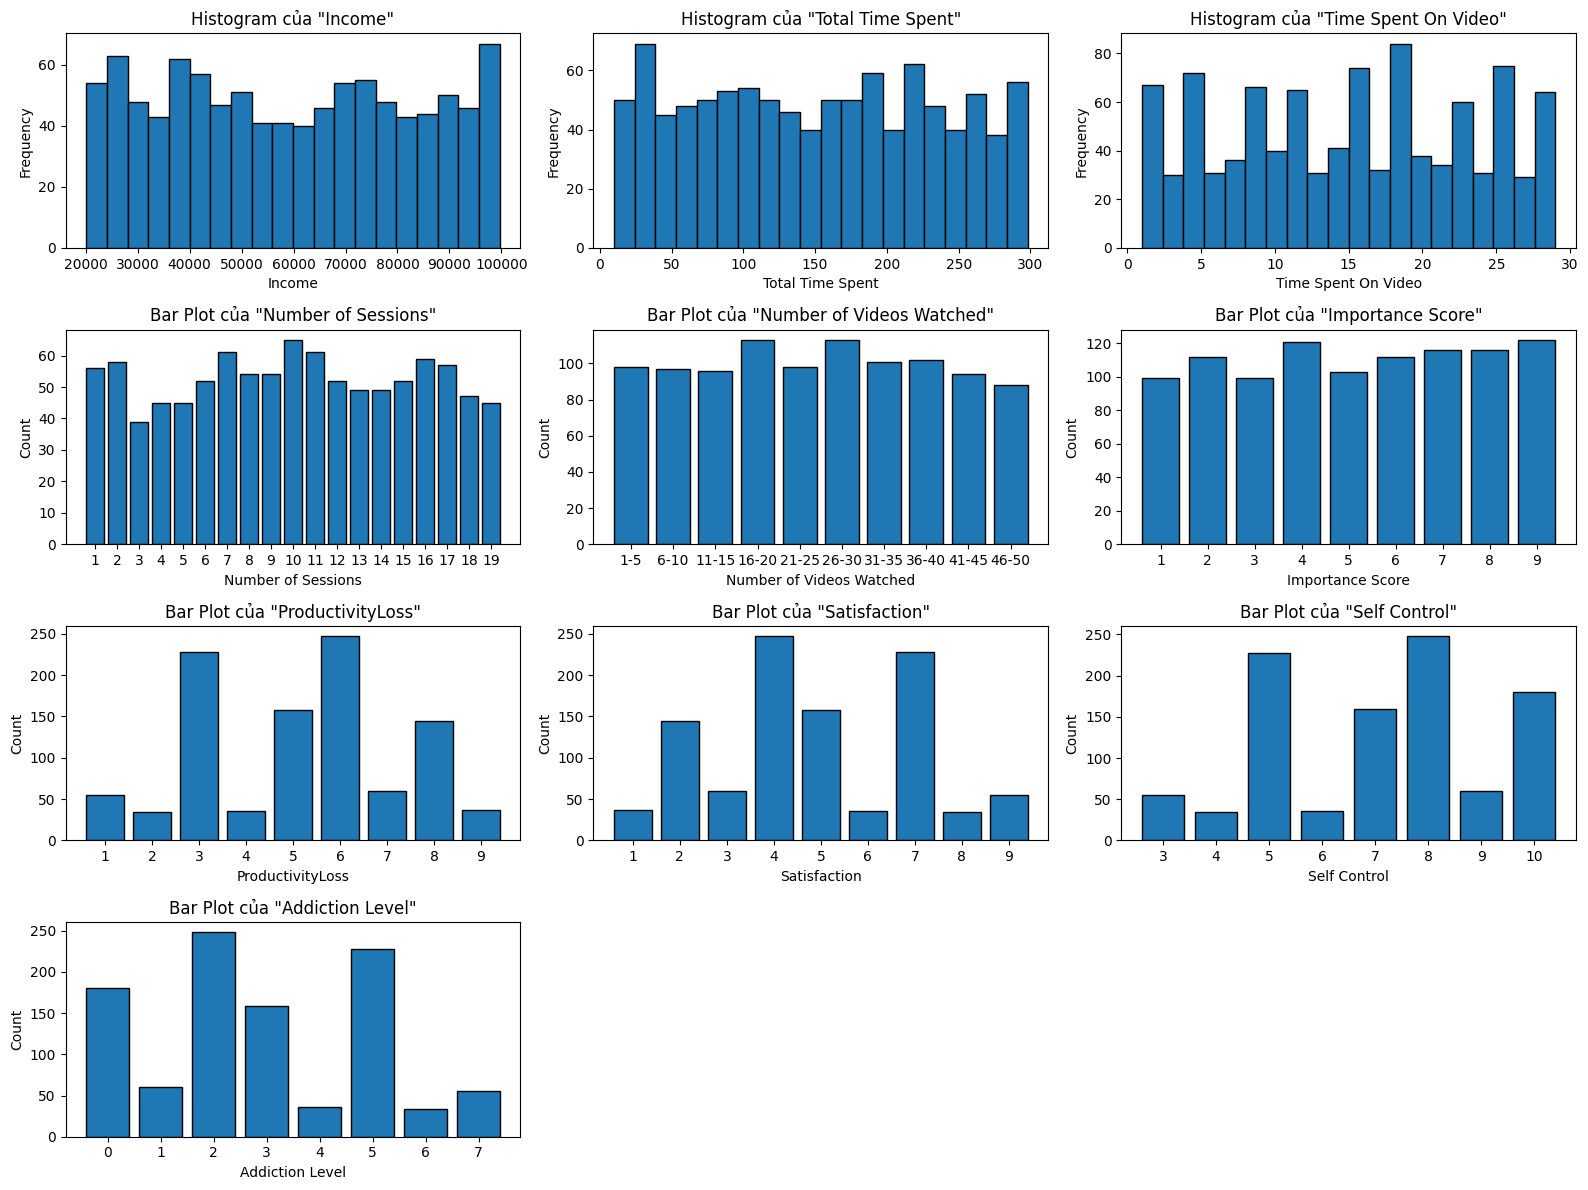

In [15]:
# Đặt các nhóm cho cột 'Number of Videos Watched' với khoảng từ 1-49
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']

# Gom nhóm cột 'Number of Videos Watched' vào các bins
videos_watched_group = pd.cut(data['Number of Videos Watched'], bins=bins, labels=labels, right=True)

# Vẽ biểu đồ phân bố giá trị của các cột (4 hàng, 3 cột)
numerical_fig, numerical_axes = plt.subplots(4, 3, figsize=(16, 12))

# Vẽ histogram cho các cột liên tục
for i, col_name in enumerate(histogram_columns):
    ax = numerical_axes[i // 3, i % 3]  # Điều chỉnh chỉ số để vẽ vào vị trí chính xác
    ax.hist(data[col_name].dropna(), bins=20, color='#1f77b4', edgecolor='black')
    ax.set_title(f'Histogram của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frequency')

# Vẽ bar chart cho các cột rời rạc
for i, col_name in enumerate(bar_columns):
    ax = numerical_axes[(i + 3) // 3, (i + 3) % 3]  # Điều chỉnh chỉ số để vẽ vào vị trí chính xác
    if col_name == 'Number of Videos Watched':  # Sử dụng nhóm giá trị đã gom cho 'Number of Videos Watched'
        value_counts = videos_watched_group.value_counts().sort_index()
    else:
        value_counts = data[col_name].value_counts().sort_index()
    ax.bar(value_counts.index, value_counts.values, color='#1f77b4', edgecolor='black')
    ax.set_title(f'Bar Plot của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    ax.set_xticks(value_counts.index)  # Đặt giới hạn trục x nếu cần

# Tắt trục của ô cuối cùng nếu không có biểu đồ
numerical_axes[3, 1].axis('off')
numerical_axes[3, 2].axis('off')

plt.tight_layout()
plt.show()


##### <a id='toc1_3_3_3_3_'></a>[Xử lý dữ liệu lỗi hoặc bất thường](#toc0_)

In [16]:
# Hàm đếm outlier dựa trên quy tắc Tukey
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Phân vị thứ 25
    Q3 = data[column].quantile(0.75)  # Phân vị thứ 75
    IQR = Q3 - Q1                    # Khoảng tứ phân vị (IQR)
    lower_bound = Q1 - 1.5 * IQR     # Ngưỡng dưới
    upper_bound = Q3 + 1.5 * IQR     # Ngưỡng trên
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Kiểm tra nếu ngưỡng dưới âm và điều chỉnh
    if lower_bound < 0:
        lower_bound = 0  # Đặt lại ngưỡng dưới bằng 0 vì nếu mang giá trị âm sẽ không hợp lý với dữ liệu
        
    return len(outliers)

def count_outliers_for_all_columns(data, numerical_columns):
    outliers_info = {}
    for column in numerical_columns:
        outlier_count = count_outliers(data, column)

        # Lưu kết quả vào info
        outliers_info[column] = {
            'Số giá trị ngoại lai': outlier_count,
            'Tỷ lệ giá trị ngoại lai': outlier_count / data.shape[0]
        }

    return outliers_info

# In kết quả
outliers_data = pd.DataFrame(count_outliers_for_all_columns(data, numerical_columns))
outliers_data

,Income,Total Time Spent,Number of Sessions,Importance Score,Time Spent On Video,Number of Videos Watched,ProductivityLoss,Satisfaction,Self Control,Addiction Level
Số giá trị ngoại lai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tỷ lệ giá trị ngoại lai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Nhận xét**:
- **Không có giá trị ngoại lai**: Dựa vào DataFrame outliers và biểu đồ Histogram bên trên, ta thấy dữ liệu không chứa giá trị ngoại lai trong các cột định lượng. Các giá trị đều nằm trong khoảng phân bố hợp lý.

- **Dữ liệu sạch và hợp lệ**: Không tồn tại dữ liệu lỗi hoặc bất thường. Điều này cho thấy dữ liệu được thu thập có chất lượng tốt, phù hợp để thực hiện các bước phân tích tiếp theo.

#### <a id='toc1_3_3_4_'></a>[Sự phân bố dữ liệu của các cột có kiểu định tính](#toc0_)
Các cột có kiểu dữ liệu định tính

In [17]:
categorical_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print('Các cột có kiểu dữ liệu định tính: ')
for col_name in categorical_columns:
    print(col_name)

Các cột có kiểu dữ liệu định tính: 
Gender
Profession
Platform
Video Category
Frequency
Watch Reason
CurrentActivity
Age Group


#### <a id='toc1_3_3_5_'></a>[Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột](#toc0_)

Với mỗi cột có kiểu dữ liệu định tính, thực hiện tính toán phần trăm (từ 0 đến 100) của giá trị thiếu

Các giá trị được làm tròn đến chữ số thập phân thứ nhất.

In [18]:
# Chọn ra các cột định tính
categorical_cols = data.select_dtypes(exclude=['number']).columns

# Hàm tính tỷ lệ giá trị thiếu
def missing_ratio(series):
    return series.isnull().mean() * 100

# Tạo DataFrame thống kê
categorical_info_df = pd.DataFrame({
    "Tỷ lệ giá trị thiếu (%)": data[categorical_cols].apply(missing_ratio).round(1),
}).T

# In kết quả
categorical_info_df

,Gender,Profession,Platform,Video Category,Frequency,Watch Reason,CurrentActivity,Age Group
Tỷ lệ giá trị thiếu (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Nhận xét**: Dữ liệu trong các cột dữ liệu dạng định tính không có bất kỳ giá trị nào bị thiếu.

#### <a id='toc1_3_3_6_'></a>[Số giá trị phân biệt của mỗi cột](#toc0_)


Với một cột dữ liệu định tính, thực hiện tính toán:
- Số giá trị phân biệt cho từng cột
- Giá trị xuất hiện nhiều nhất (mode): Tìm giá trị phổ biến nhất trong cột (nếu có nhiều giá trị bằng nhau, chọn ngẫu nhiên một giá trị).
- Tần suất xuất hiện của giá trị phổ biến nhất: Đếm số lần xuất hiện của giá trị phổ biến nhất.

In [19]:
# Hàm tính giá trị phổ biến nhất (mode) và tần suất của nó
def mode_value(series):
    if series.mode().empty:
        return None  # Nếu không có mode
    return series.mode()[0]

def mode_frequency(series):
    if series.mode().empty:
        return 0  # Nếu không có mode
    return (series == series.mode()[0]).sum()

# Tạo DataFrame thống kê
categorical_info_df = pd.DataFrame({
    "Số lượng giá trị phân biệt": data[categorical_cols].nunique(),
    "Giá trị phổ biến nhất": data[categorical_cols].apply(mode_value),
    "Tần suất của giá trị phổ biến nhất": data[categorical_cols].apply(mode_frequency)
}).T

# In kết quả
categorical_info_df

,Gender,Profession,Platform,Video Category,Frequency,Watch Reason,CurrentActivity,Age Group
Số lượng giá trị phân biệt,3,9,4,9,4,4,4,4
Giá trị phổ biến nhất,Male,Students,TikTok,Jokes/Memes,Evening,Habit,At home,Adult
Tần suất của giá trị phổ biến nhất,514,246,273,179,365,339,381,416


Với dữ liệu định tính, nhóm sẽ sử dụng **bar chart** cho các cột có từ hơn 5 giá trị phân biệt trở lên và **pie chart** cho các cột còn lại để trực quan hóa sự phân bố các giá trị của các cột này.

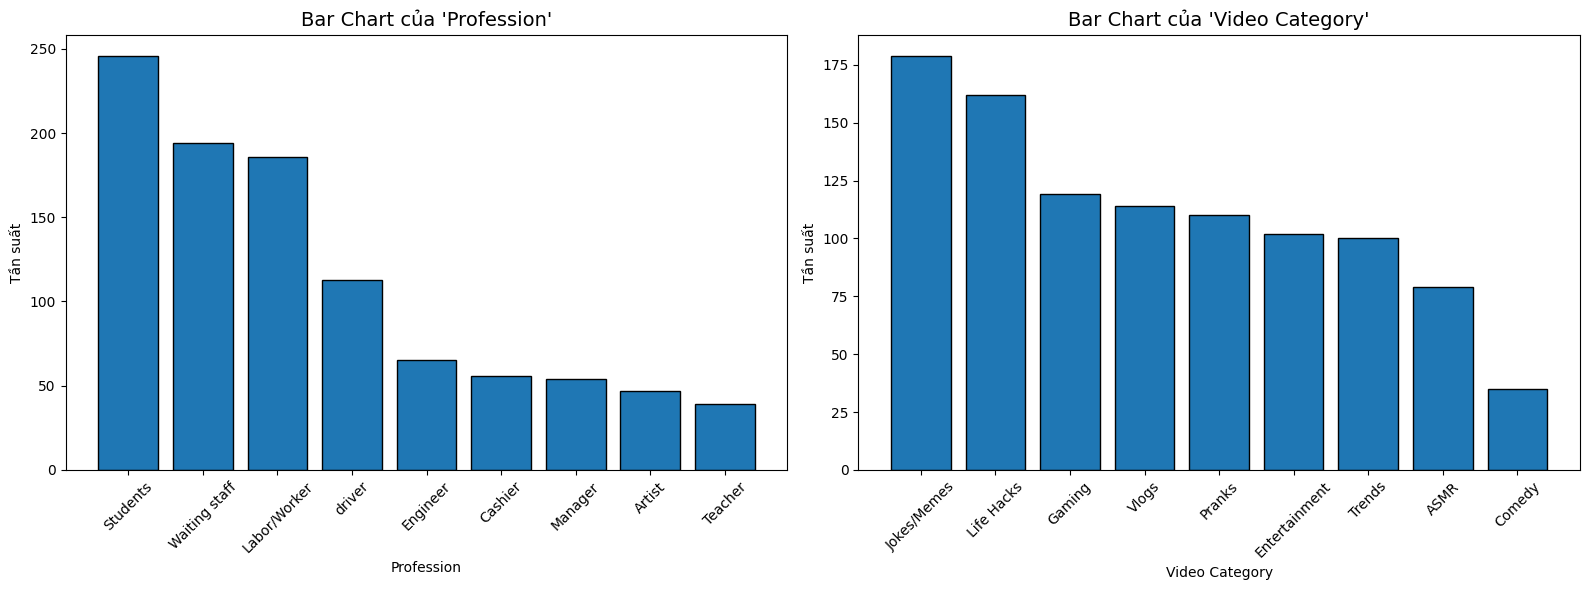

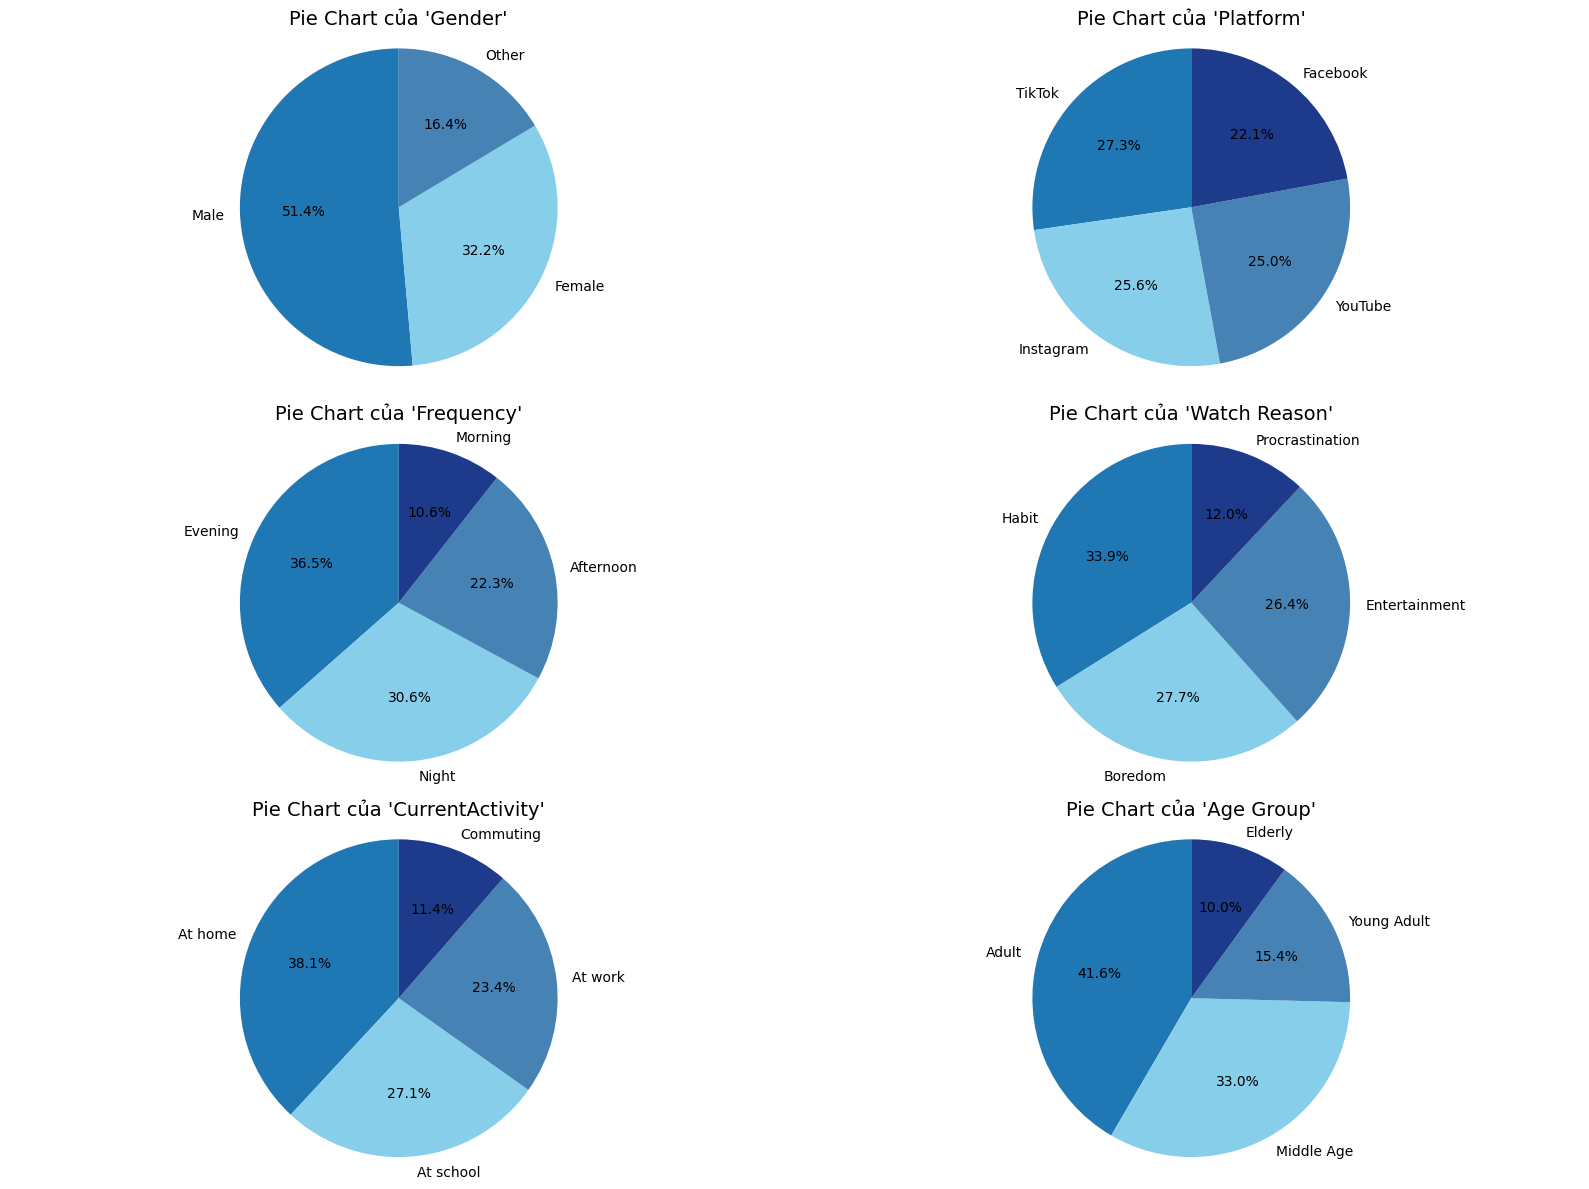

In [20]:
# Bảng màu cho pie chart
colors = ['#1f77b4', '#87CEEB', '#4682B4', '#1E3A8A', '#00008B']

# Tạo 2 biểu đồ riêng biệt: Một cho bar chart và một cho pie chart
# Biểu đồ bar chart
bar_chart_cols = [col for col in categorical_cols if len(data[col].value_counts()) > 5]
fig_bar, axes_bar = plt.subplots(len(bar_chart_cols)//2, 2, figsize=(16, 3 * len(bar_chart_cols)))
if len(bar_chart_cols) == 1:
    axes_bar = [axes_bar]
else:
    axes_bar = axes_bar.flatten()

for i, col in enumerate(bar_chart_cols):
    value_counts = data[col].value_counts()  # Đếm tần suất các giá trị trong cột
    axes_bar[i].bar(value_counts.index, value_counts.values, color='#1f77b4', edgecolor='black')
    axes_bar[i].set_title(f"Bar Chart của '{col}'", fontsize=14)
    axes_bar[i].set_xlabel(col)
    axes_bar[i].set_ylabel("Tần suất")
    axes_bar[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Biểu đồ pie chart
pie_chart_cols = [col for col in categorical_cols if len(data[col].value_counts()) <= 5]
fig_pie, axes_pie = plt.subplots(len(pie_chart_cols)//2, 2, figsize=(16, 2 * len(pie_chart_cols)))
if len(pie_chart_cols) == 1:
    axes_pie = [axes_pie]
else:
    axes_pie = axes_pie.flatten()

for i, col in enumerate(pie_chart_cols):
    value_counts = data[col].value_counts()  # Đếm tần suất các giá trị trong cột
    axes_pie[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(value_counts)])
    axes_pie[i].set_title(f"Pie Chart của '{col}'", fontsize=14)
    axes_pie[i].axis('equal')  # Đảm bảo pie chart tròn

plt.tight_layout()
plt.show() 


**Tổng quan:** không có cột nào có dữ liệu bị thiếu và cũng không có gì bất thường ở đây cả. Điều này cho thấy dữ liệu được thu thập có chất lượng tốt, phù hợp để thực hiện các bước phân tích tiếp theo.

## <a id='toc1_4_'></a>[SAU CÁC BƯỚC TIỀN XỬ LÝ](#toc0_)

Số hàng, số cột của dữ liệu:

In [21]:
data.shape

(1000, 18)

Mỗi cột có ý nghĩa sau: 
|Tên cột|Ý nghĩa|
|-------|-------|
| Gender| Giới tính của người dùng|
| Income| Thu nhập của người dùng|
| Profession| Nghề nghiệp của người dùng|
| Platform| Nền tảng mà người dùng truy cập|
| Total Time Spent| Tổng thời gian người dùng đã dành trên nên tảng|
| Number of Sessions| Số lần người dùng truy cập vào nền tảng|
| Video Category| Thể loại của video|
| Importance Score| Điểm đánh giá tầm quan trọng của video đối với người dùng|
| Time Spent On Video| Thời gian người dùng dành để xem một video cụ thể|
| Number of Videos Watched| Số lượng video người dùng đã xem|
| Frequency| Tần suất người dùng tương tác với nền tảng|
| ProductivityLoss| Tác động của việc sử dụng nền tảng đến năng suất của người dùng|
| Satisfaction| Mức độ hài lòng của người dùng|
| Watch Reason| Lý do người dùng xem video|
| Self Control| Mức độ kiểm soát việc sử dụng nền tảng của người dùng|
| Addiction Level| Mức độ nghiện của người dùng vào nền tảng|
| CurrentActivity| Người dùng đang làm gì khi xem video|
| Age Group| Nhóm tuổi của người dùng|

Kiểu dữ liệu của các cột

In [22]:
data.dtypes

Gender                      category
Income                         int64
Profession                  category
Platform                    category
Total Time Spent               int64
Number of Sessions             int64
Video Category              category
Importance Score               int64
Time Spent On Video            int64
Number of Videos Watched       int64
Frequency                   category
ProductivityLoss               int64
Satisfaction                   int64
Watch Reason                category
Self Control                   int64
Addiction Level                int64
CurrentActivity             category
Age Group                   category
dtype: object

Thực hiện lưu dữ liệu này vào 1 tệp mới và thực hiện phân tích trên tệp này.

In [23]:
data.to_csv('../Data/Time-Wasters on Social Media_Cleaned.csv', index=False)